<a href="https://colab.research.google.com/github/MLDreamer/AIMathematicallyexplained/blob/main/SVD_explainer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🎨 Generating Visualization 1: Image Compression Magic


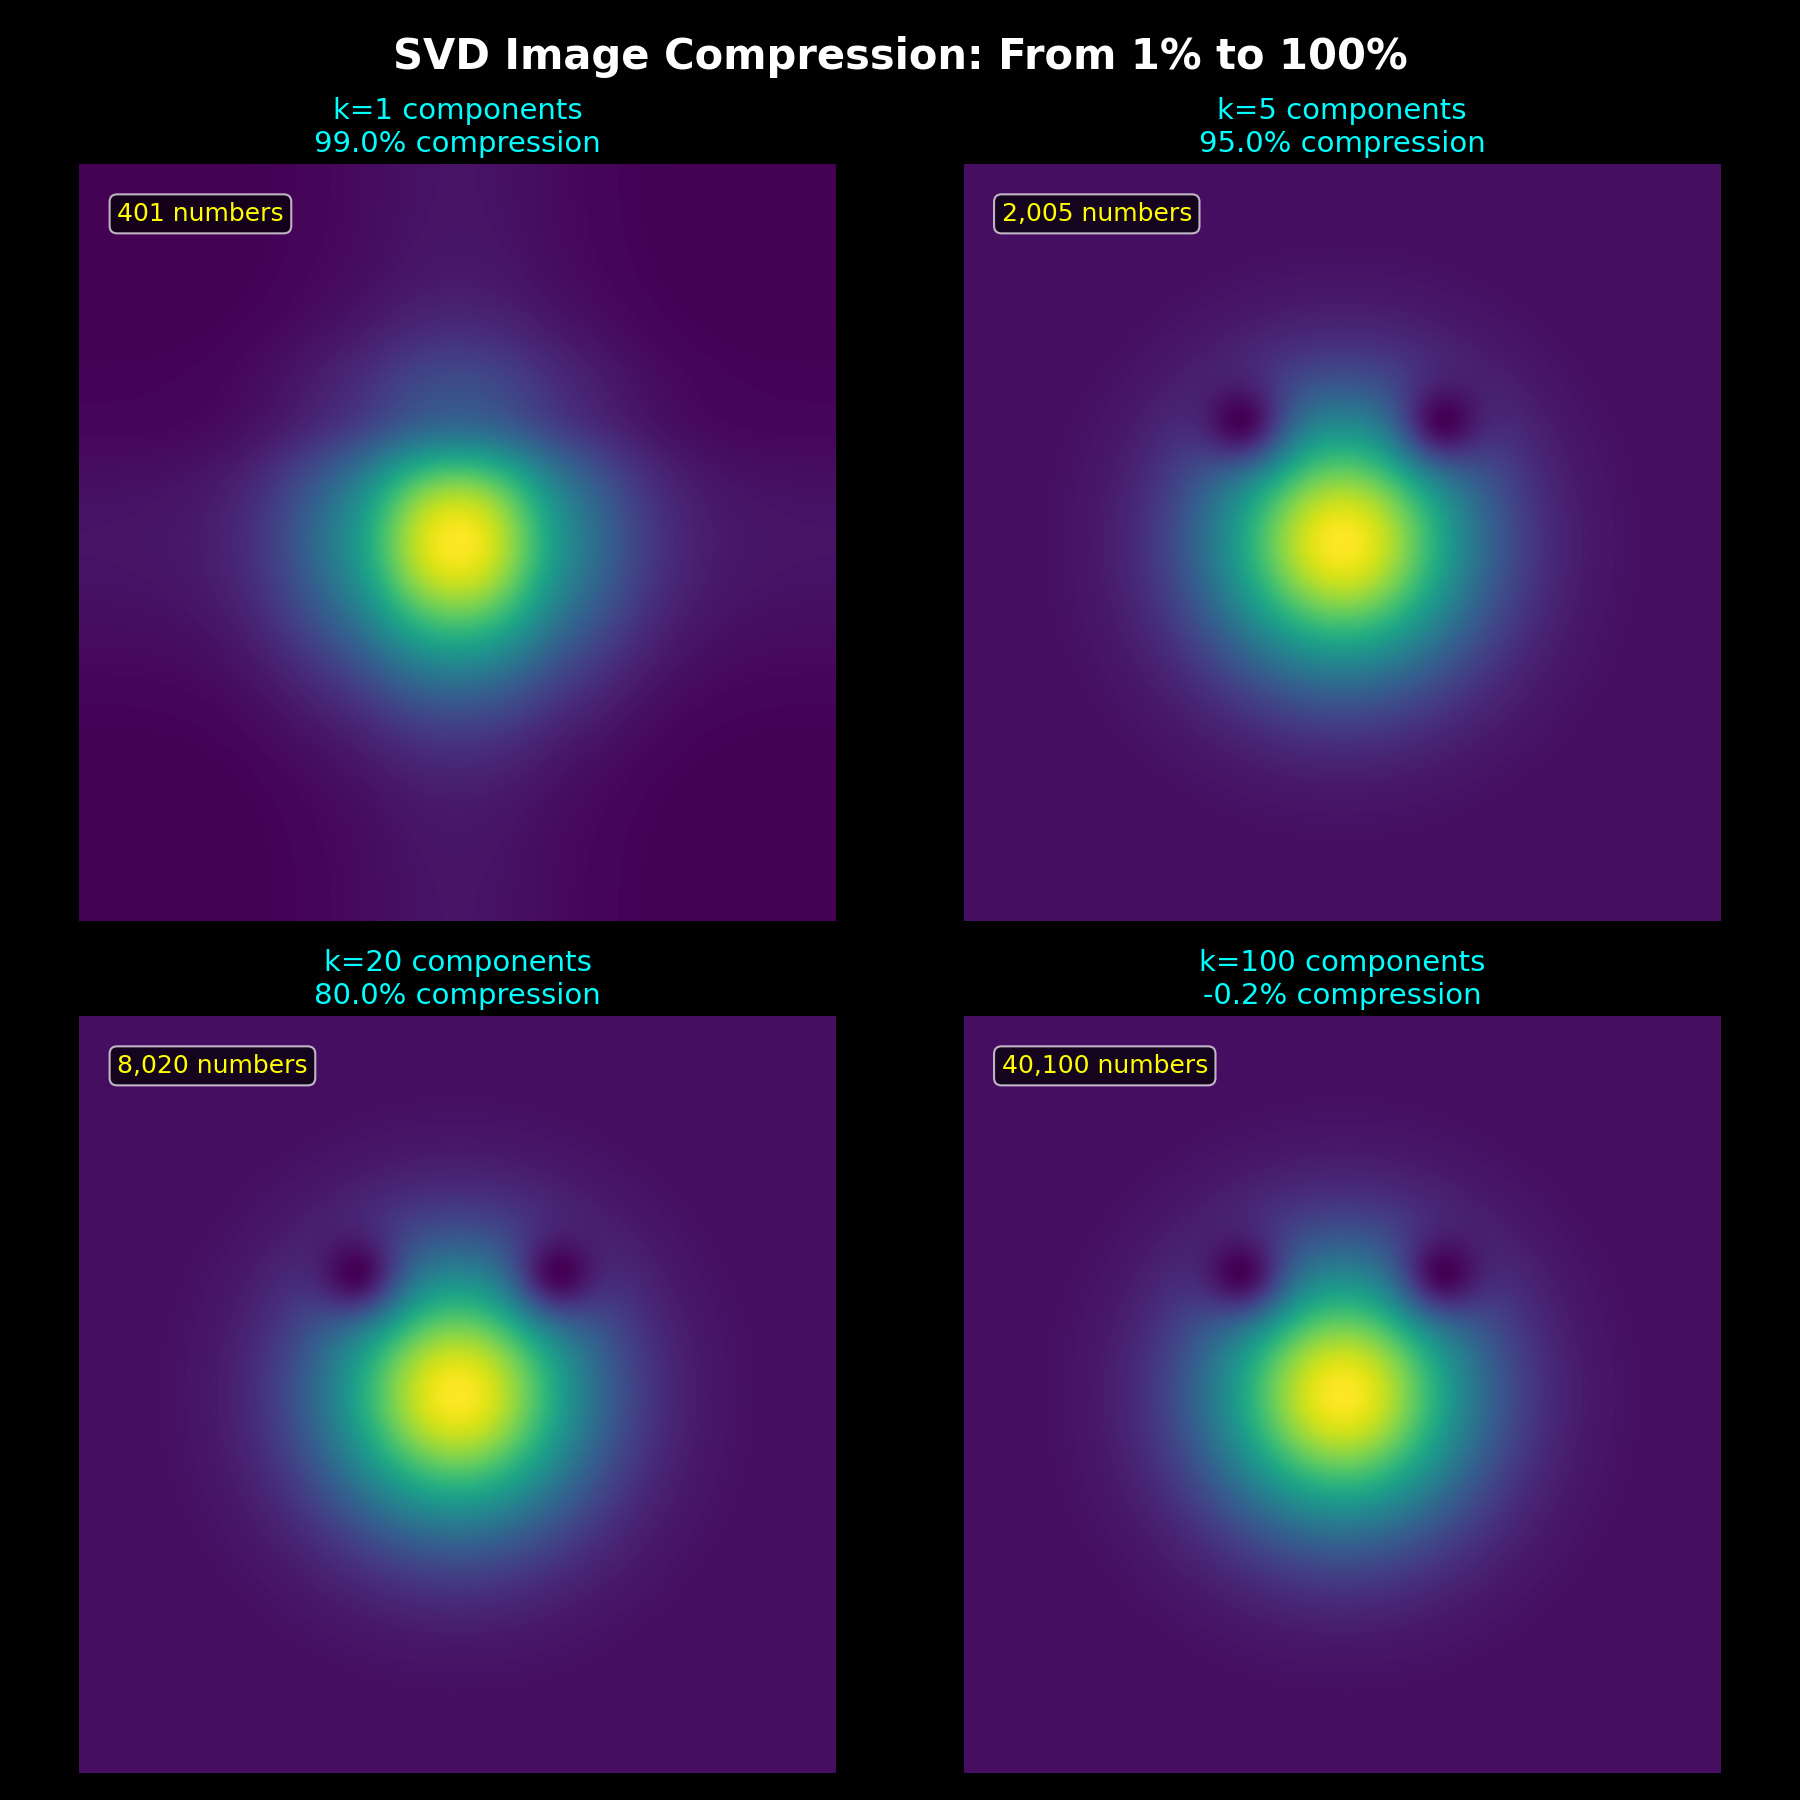

🎨 Generating Visualization 2: Sphere to Ellipsoid Transformation
✅ Saved: sphere_to_ellipsoid.gif


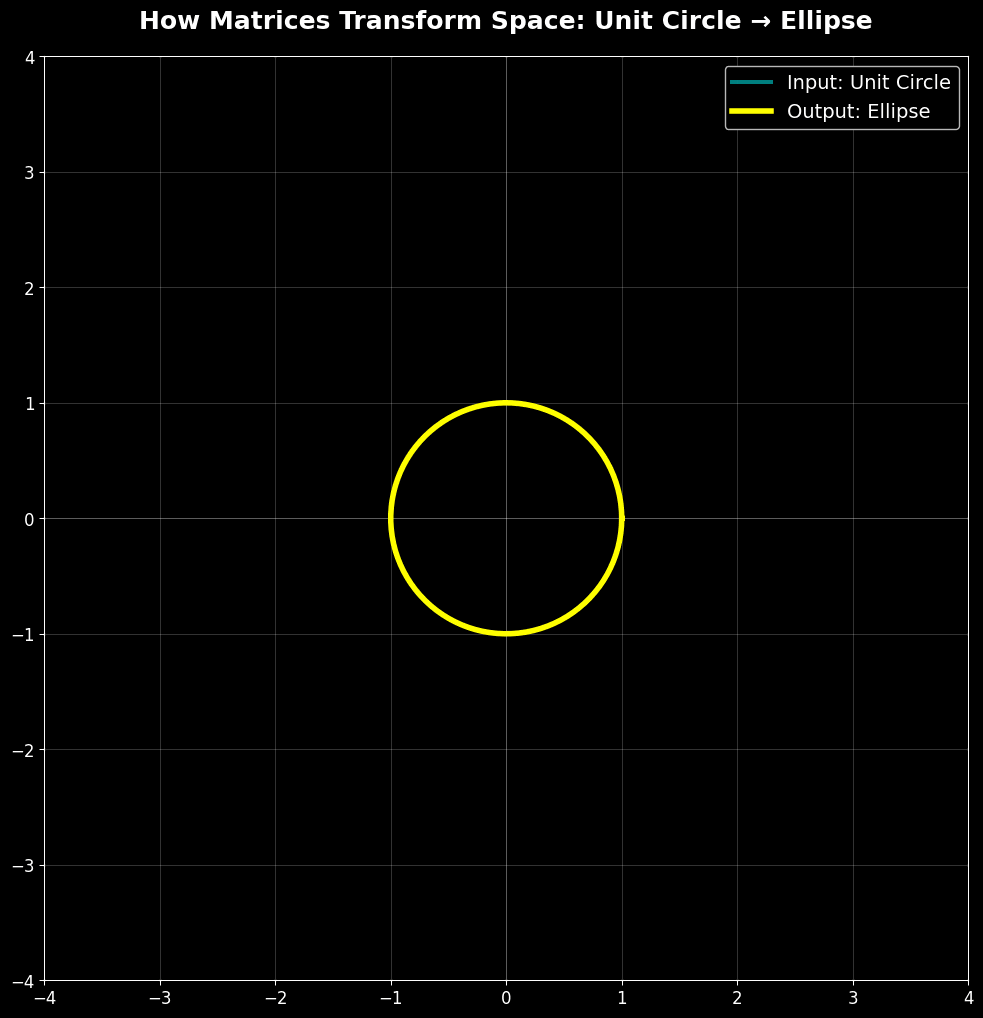

🎨 Generating Visualization 3: SVD Decomposition Steps
✅ Saved: svd_decomposition.gif


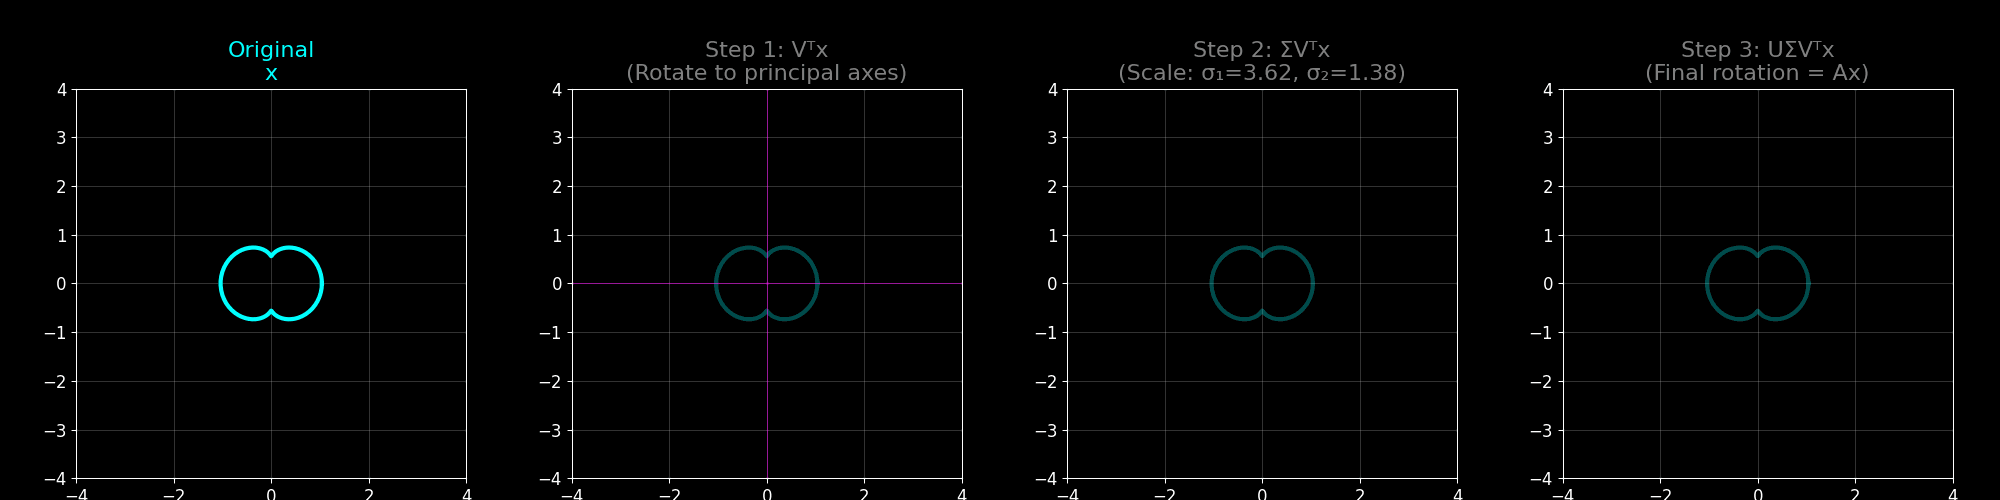

🎨 Generating Visualization 4: Singular Value Energy Distribution
✅ Saved: singular_value_energy.png


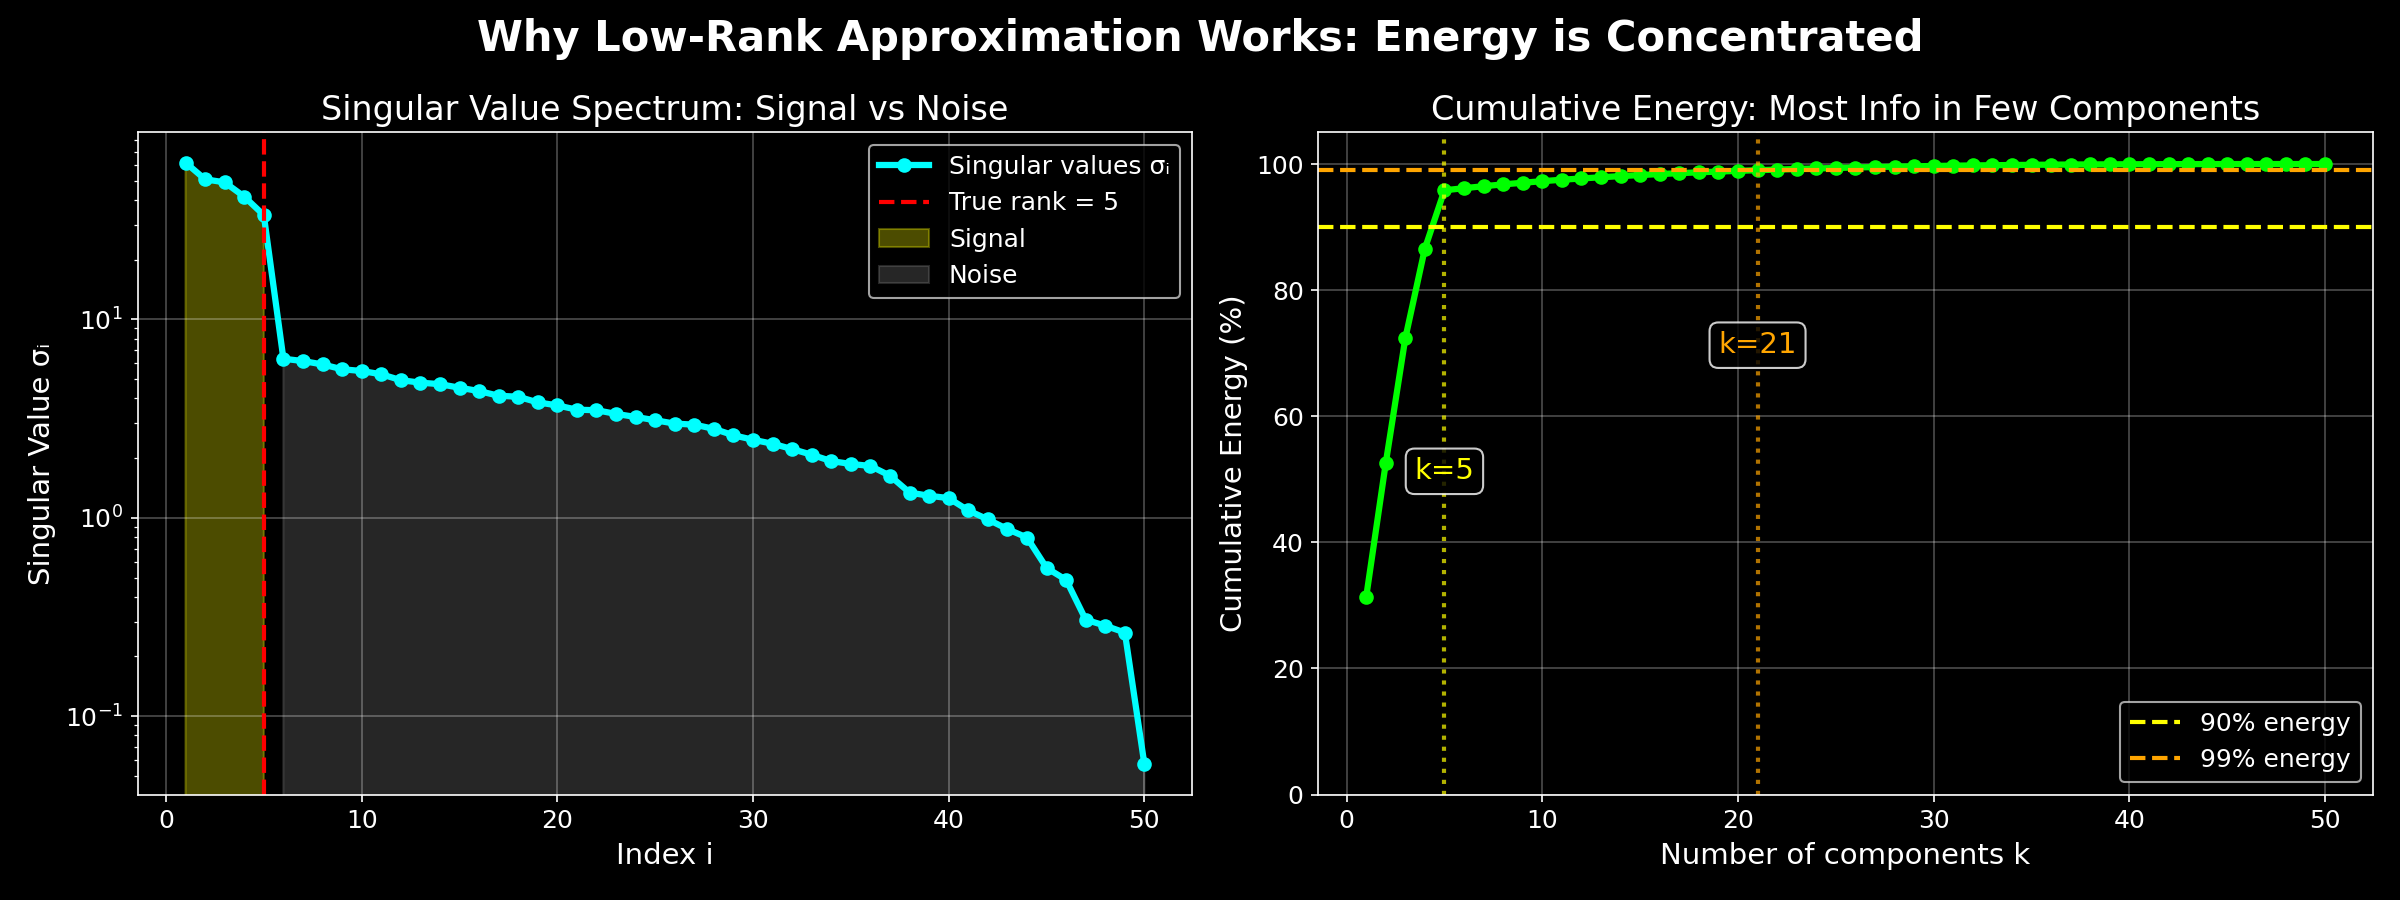

🎨 Generating Visualization 5: Low-Rank Approximation Quality
✅ Saved: lowrank_approximation.gif


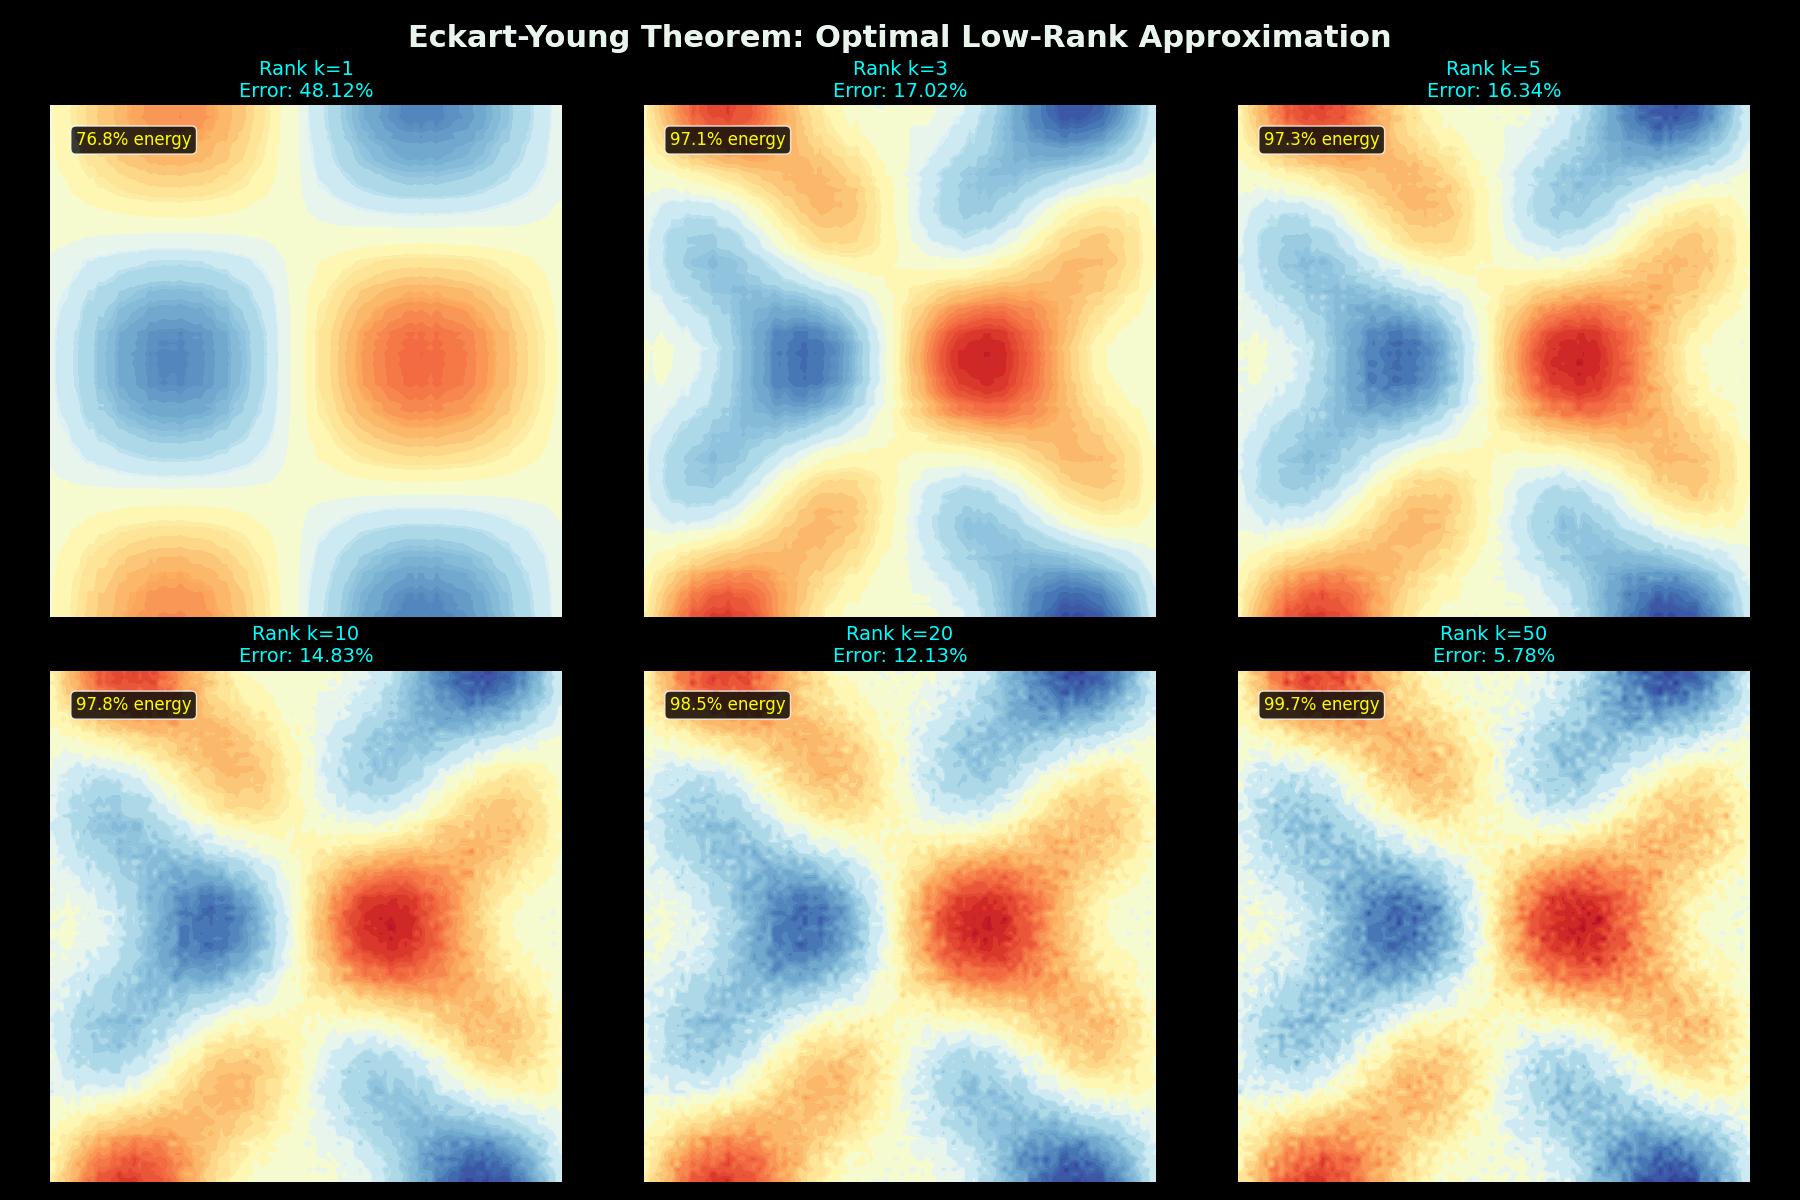

🎨 Generating Visualization 6: PCA = SVD Visualization
✅ Saved: pca_svd_connection.png


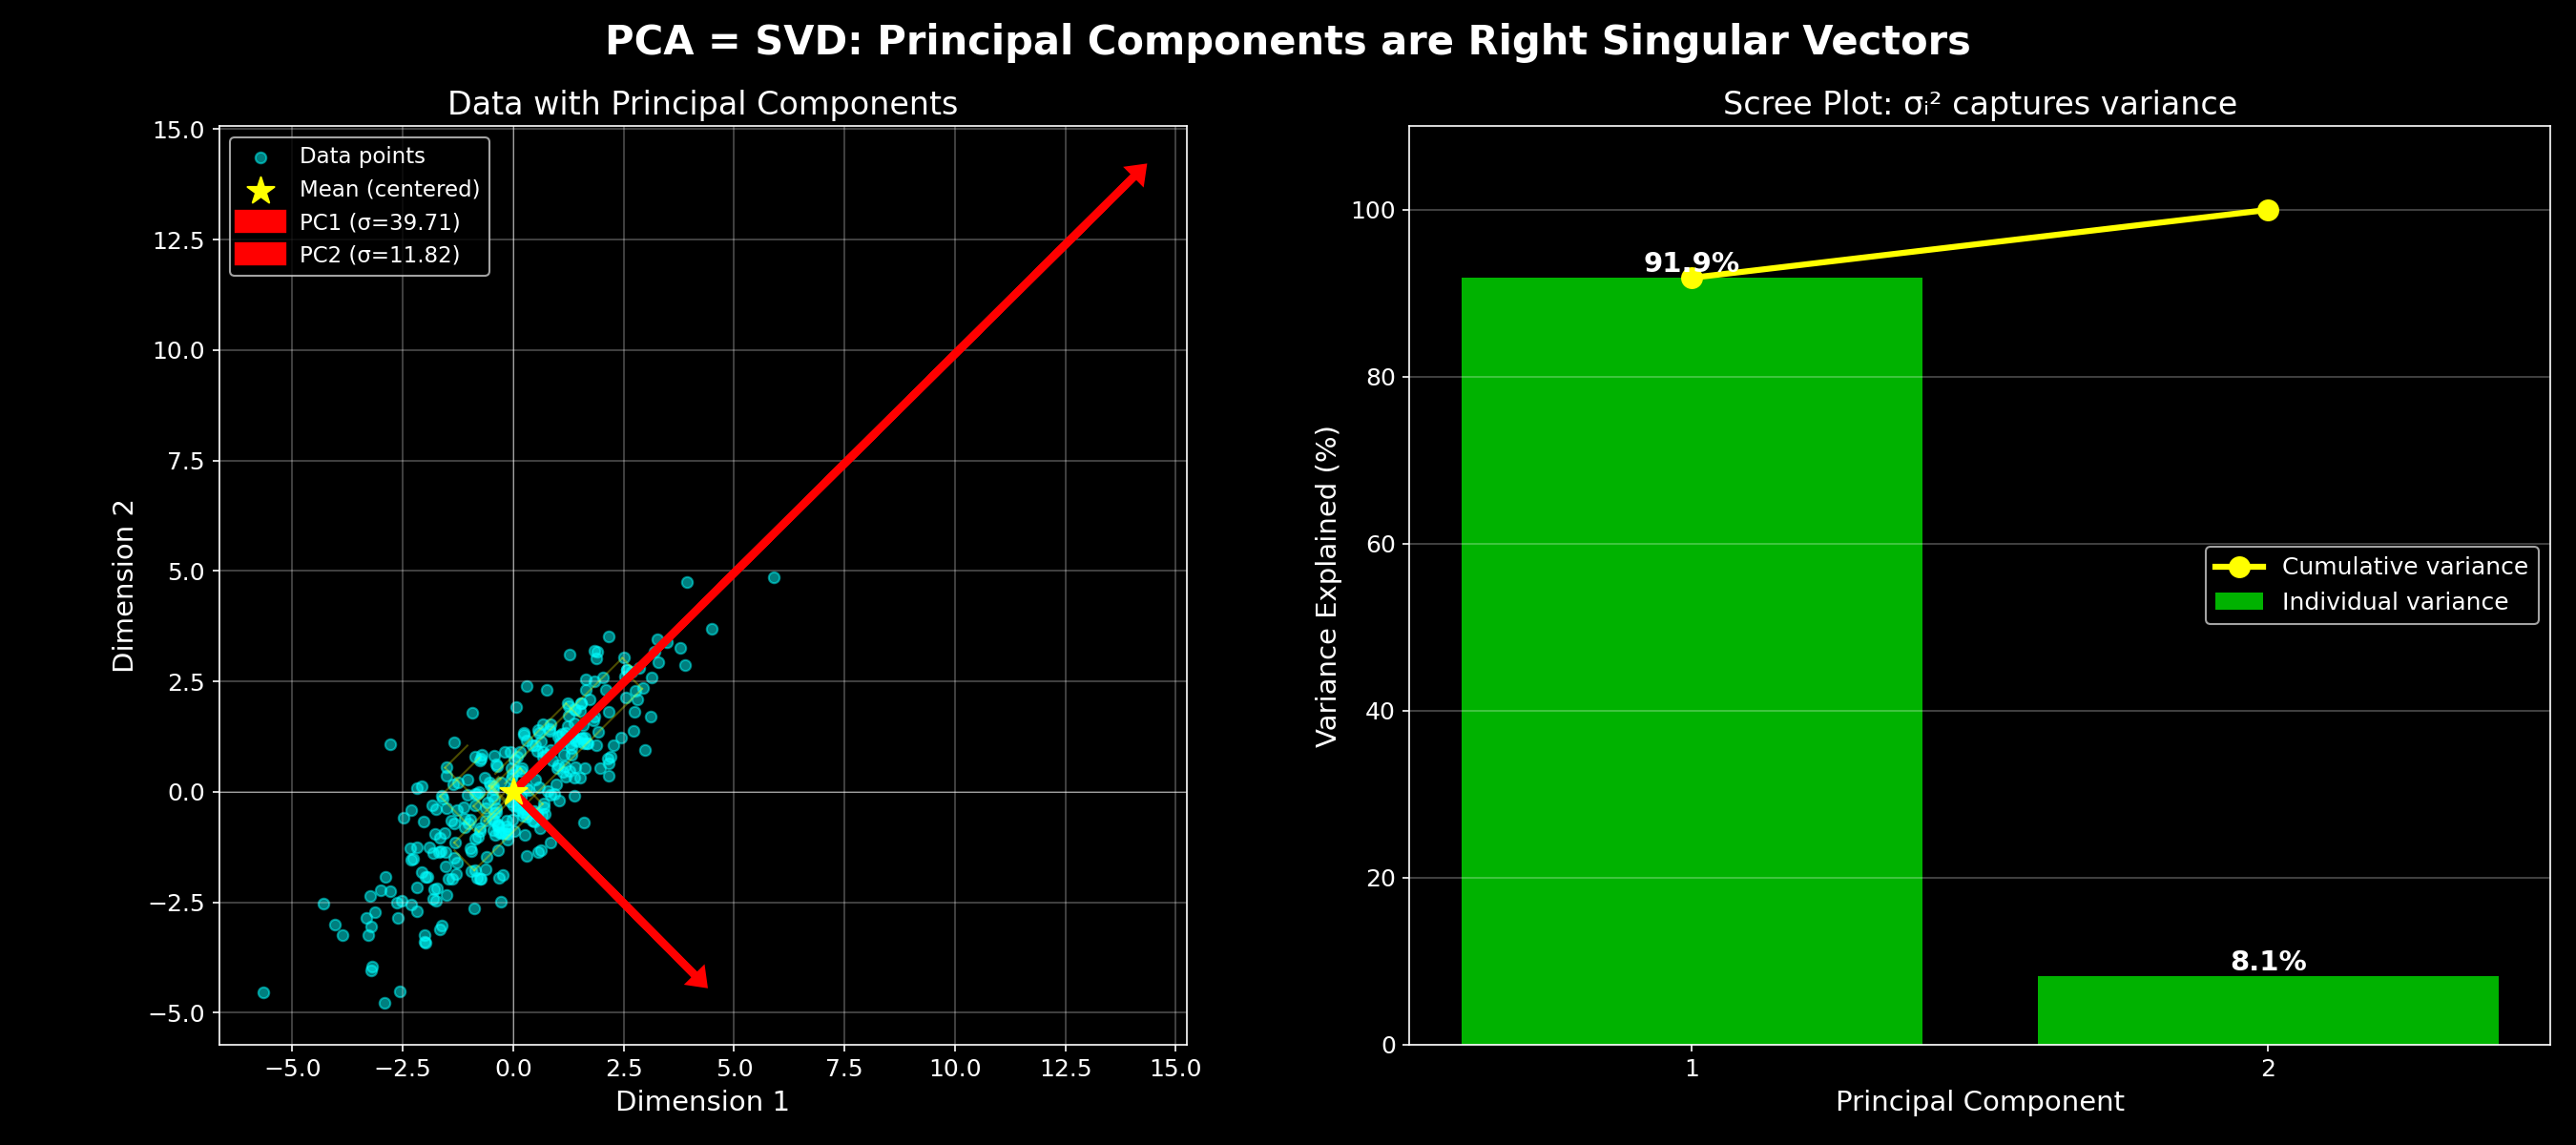


🎉 ALL VISUALIZATIONS GENERATED SUCCESSFULLY!

Generated files:
  1. sphere_to_ellipsoid.gif - Unit circle transforming to ellipse
  2. svd_decomposition.gif - Three-step decomposition visualization
  3. singular_value_energy.png - Energy distribution in singular values
  4. lowrank_approximation.gif - Progressive rank-k approximation
  5. pca_svd_connection.png - PCA as SVD of data matrix

💡 These visualizations will make your SVD article go viral!
   Each one explains complex math concepts elegantly through animation.

📤 Download these files and embed them in your article at:
   - Section 2: sphere_to_ellipsoid.gif
   - Section 3: svd_decomposition.gif
   - Section 5: singular_value_energy.png
   - Section 9: lowrank_approximation.gif
   - Section 11: pca_svd_connection.png


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch, Circle, Ellipse
from matplotlib.animation import FuncAnimation, PillowWriter
import imageio.v2 as imageio # Updated import for imageio
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Image, display
import io

# Set style for publication-quality figures
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16

# ============================================================================
# VISUALIZATION 1: The Hook - Image Compression Magic
# ============================================================================

print("🎨 Generating Visualization 1: Image Compression Magic")

def create_compression_demo():
    """Show how SVD compresses an image progressively"""

    # Create a synthetic "face-like" image with structure
    n = 200
    x, y = np.meshgrid(np.linspace(-2, 2, n), np.linspace(-2, 2, n))

    # Create face features with clear structure
    face = np.exp(-(x**2 + y**2) / 0.5)  # Head
    left_eye = np.exp(-((x+0.5)**2 + (y+0.6)**2) / 0.05)
    right_eye = np.exp(-((x-0.5)**2 + (y+0.6)**2) / 0.05)
    mouth = np.exp(-(x**2 + (y-0.4)**2) / 0.1) * (y < -0.3)

    image = face - 0.3*left_eye - 0.3*right_eye - 0.2*mouth
    image = (image - image.min()) / (image.max() - image.min())

    # Compute SVD
    U, S, Vt = np.linalg.svd(image, full_matrices=False)

    # Create animation showing progressive reconstruction
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    fig.suptitle('SVD Image Compression: From 1% to 100%',
                 fontsize=20, weight='bold', color='white')

    frames = []
    k_values = [1, 5, 20, 100]

    for idx, k in enumerate(k_values):
        ax = axes[idx // 2, idx % 2]

        # Reconstruct image with k components
        reconstructed = U[:, :k] @ np.diag(S[:k]) @ Vt[:k, :]

        # Calculate compression ratio
        original_size = n * n
        compressed_size = k * (n + n + 1)
        compression_ratio = (1 - compressed_size / original_size) * 100

        ax.imshow(reconstructed, cmap='viridis', interpolation='bilinear')
        ax.set_title(f'k={k} components\n{compression_ratio:.1f}% compression',
                    fontsize=14, color='cyan')
        ax.axis('off')

        # Add text showing data size
        ax.text(0.05, 0.95, f'{compressed_size:,} numbers',
               transform=ax.transAxes, fontsize=12,
               verticalalignment='top', color='yellow',
               bbox=dict(boxstyle='round', facecolor='black', alpha=0.7))

    plt.tight_layout()

    # Save as PNG first
    buf = io.BytesIO()
    plt.savefig(buf, format='png', dpi=150, facecolor='black')
    buf.seek(0)
    plt.close()

    return Image(buf.read())

display(create_compression_demo())

# ============================================================================
# VISUALIZATION 2: Unit Sphere to Ellipsoid Transformation
# ============================================================================

print("🎨 Generating Visualization 2: Sphere to Ellipsoid Transformation")

def create_sphere_to_ellipsoid_gif():
    """Animate the transformation of a unit sphere into an ellipsoid"""

    # Create a 2D matrix with clear singular values
    A = np.array([[3, 1], [1, 2]])
    U, S, Vt = np.linalg.svd(A)

    # Generate points on unit circle
    theta = np.linspace(0, 2*np.pi, 100)
    circle = np.array([np.cos(theta), np.sin(theta)])

    # Create figure
    fig, ax = plt.subplots(figsize=(12, 12))

    frames = []
    n_frames = 120

    for i in range(n_frames):
        ax.clear()

        # Interpolation parameter (0 to 1)
        t = i / (n_frames - 1)

        # Smooth interpolation using ease-in-out
        t_smooth = 3*t**2 - 2*t**3

        # Interpolate transformation: I → A
        A_t = (1 - t_smooth) * np.eye(2) + t_smooth * A

        # Apply transformation
        transformed = A_t @ circle

        # Plot
        ax.plot(circle[0], circle[1], 'cyan', linewidth=3,
               label='Input: Unit Circle', alpha=0.5)
        ax.plot(transformed[0], transformed[1], 'yellow', linewidth=4,
               label='Output: Ellipse', zorder=10)

        # Draw axes
        ax.axhline(y=0, color='white', linewidth=0.5, alpha=0.3)
        ax.axvline(x=0, color='white', linewidth=0.5, alpha=0.3)

        # Draw principal axes if transformation is complete
        if t > 0.7:
            # Clamp alpha to ensure it doesn't exceed 1 due to floating point inaccuracies
            alpha = min(1, (t - 0.7) / 0.3)
            # Left singular vectors (output directions)
            for j in range(2):
                vec = U[:, j] * S[j]
                ax.arrow(0, 0, vec[0], vec[1], head_width=0.3,
                        head_length=0.2, fc='red', ec='red',
                        linewidth=3, alpha=alpha, zorder=5)

            ax.text(0.02, 0.98, f'σ₁ = {S[0]:.2f}\nσ₂ = {S[1]:.2f}',
                   transform=ax.transAxes, fontsize=16,
                   verticalalignment='top', color='red',
                   bbox=dict(boxstyle='round', facecolor='black', alpha=0.8))

        ax.set_xlim(-4, 4)
        ax.set_ylim(-4, 4)
        ax.set_aspect('equal')
        ax.legend(loc='upper right', fontsize=14, framealpha=0.9)
        ax.set_title('How Matrices Transform Space: Unit Circle → Ellipse',
                    fontsize=18, weight='bold', pad=20)
        ax.grid(True, alpha=0.2)

        # Convert plot to image
        buf = io.BytesIO()
        plt.savefig(buf, format='png', dpi=100, facecolor='black',
                   bbox_inches='tight')
        buf.seek(0)
        frames.append(imageio.imread(buf)) # Replaced imageio.imread with imageio.v2.imread
        buf.close()

    plt.close()

    # Save as GIF
    imageio.mimsave('sphere_to_ellipsoid.gif', frames, duration=0.05, loop=0)
    print("✅ Saved: sphere_to_ellipsoid.gif")

    return Image('sphere_to_ellipsoid.gif')

display(create_sphere_to_ellipsoid_gif())

# ============================================================================
# VISUALIZATION 3: The Three Matrices - Rotate, Scale, Rotate
# ============================================================================

print("🎨 Generating Visualization 3: SVD Decomposition Steps")

def create_svd_decomposition_gif():
    """Animate the three steps: Vᵀ (rotate), Σ (scale), U (rotate)"""

    A = np.array([[3, 1], [1, 2]])
    U, S, Vt = np.linalg.svd(A)

    # Create a distinctive shape (not a circle)
    t = np.linspace(0, 2*np.pi, 100)
    shape = np.array([
        np.cos(t) + 0.3*np.cos(3*t),
        np.sin(t) + 0.3*np.sin(3*t)
    ]) * 0.8

    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    fig.suptitle('SVD: A = U Σ Vᵀ  →  Rotate → Scale → Rotate',
                 fontsize=22, weight='bold', color='white', y=1.05)

    frames = []
    n_frames = 150

    for frame in range(n_frames):
        for ax in axes:
            ax.clear()

        t = frame / (n_frames - 1)

        # Step 0: Original
        axes[0].plot(shape[0], shape[1], 'cyan', linewidth=3)
        axes[0].set_title('Original\nx', fontsize=16, color='cyan')
        axes[0].set_xlim(-4, 4)
        axes[0].set_ylim(-4, 4)
        axes[0].set_aspect('equal')
        axes[0].grid(True, alpha=0.2)

        # Step 1: Apply Vᵀ (first rotation)
        if t > 0.25:
            t1 = min(1, (t - 0.25) / 0.25)
            t1 = 3*t1**2 - 2*t1**3  # Smooth
            R1 = (1-t1)*np.eye(2) + t1*Vt
            step1 = R1 @ shape
            axes[1].plot(step1[0], step1[1], 'magenta', linewidth=3)
            axes[1].set_title('Step 1: Vᵀx\n(Rotate to principal axes)',
                            fontsize=16, color='magenta')
        else:
            axes[1].plot(shape[0], shape[1], 'cyan', linewidth=3, alpha=0.3)
            axes[1].set_title('Step 1: Vᵀx\n(Rotate to principal axes)',
                            fontsize=16, color='gray')

        axes[1].set_xlim(-4, 4)
        axes[1].set_ylim(-4, 4)
        axes[1].set_aspect('equal')
        axes[1].grid(True, alpha=0.2)
        axes[1].axhline(y=0, color='magenta', linewidth=1, alpha=0.5)
        axes[1].axvline(x=0, color='magenta', linewidth=1, alpha=0.5)

        # Step 2: Apply Σ (scaling)
        if t > 0.5:
            t2 = min(1, (t - 0.5) / 0.25)
            t2 = 3*t2**2 - 2*t2**3
            step1 = Vt @ shape
            Sigma = np.diag([1 + t2*(S[0]-1), 1 + t2*(S[1]-1)])
            step2 = Sigma @ step1
            axes[2].plot(step2[0], step2[1], 'yellow', linewidth=3)
            axes[2].set_title(f'Step 2: ΣVᵀx\n(Scale: σ₁={S[0]:.2f}, σ₂={S[1]:.2f})',
                            fontsize=16, color='yellow')
        else:
            if t > 0.25:
                step1 = Vt @ shape
                axes[2].plot(step1[0], step1[1], 'magenta', linewidth=3, alpha=0.3)
            else:
                axes[2].plot(shape[0], shape[1], 'cyan', linewidth=3, alpha=0.3)
            axes[2].set_title(f'Step 2: ΣVᵀx\n(Scale: σ₁={S[0]:.2f}, σ₂={S[1]:.2f})',
                            fontsize=16, color='gray')

        axes[2].set_xlim(-4, 4)
        axes[2].set_ylim(-4, 4)
        axes[2].set_aspect('equal')
        axes[2].grid(True, alpha=0.2)

        # Step 3: Apply U (second rotation)
        if t > 0.75:
            t3 = min(1, (t - 0.75) / 0.25)
            t3 = 3*t3**2 - 2*t3**3
            step2 = np.diag(S) @ Vt @ shape
            R3 = (1-t3)*np.eye(2) + t3*U
            step3 = R3 @ step2
            axes[3].plot(step3[0], step3[1], 'lime', linewidth=4)
            axes[3].set_title('Step 3: UΣVᵀx\n(Final rotation = Ax)',
                            fontsize=16, color='lime')
        else:
            if t > 0.5:
                step2 = np.diag(S) @ Vt @ shape
                axes[3].plot(step2[0], step2[1], 'yellow', linewidth=3, alpha=0.3)
            elif t > 0.25:
                step1 = Vt @ shape
                axes[3].plot(step1[0], step1[1], 'magenta', linewidth=3, alpha=0.3)
            else:
                axes[3].plot(shape[0], shape[1], 'cyan', linewidth=3, alpha=0.3)
            axes[3].set_title('Step 3: UΣVᵀx\n(Final rotation = Ax)',
                            fontsize=16, color='gray')

        axes[3].set_xlim(-4, 4)
        axes[3].set_ylim(-4, 4)
        axes[3].set_aspect('equal')
        axes[3].grid(True, alpha=0.2)

        plt.tight_layout()

        buf = io.BytesIO()
        plt.savefig(buf, format='png', dpi=100, facecolor='black') # Removed bbox_inches='tight'
        buf.seek(0)
        frames.append(imageio.imread(buf))
        buf.close()

    plt.close()

    imageio.mimsave('svd_decomposition.gif', frames, duration=0.05, loop=0)
    print("✅ Saved: svd_decomposition.gif")

    return Image('svd_decomposition.gif')

display(create_svd_decomposition_gif())

# ============================================================================
# VISUALIZATION 4: Singular Values - The Importance Hierarchy
# ============================================================================

print("🎨 Generating Visualization 4: Singular Value Energy Distribution")

def create_singular_value_energy():
    """Show how singular values capture energy/information"""

    # Create a matrix with clear rank structure
    np.random.seed(42)
    n = 50

    # Low-rank structure + noise
    r = 5
    U_true = np.random.randn(n, r)
    V_true = np.random.randn(n, r)
    signal = U_true @ V_true.T
    noise = np.random.randn(n, n) * 0.5

    A = signal + noise
    U, S, Vt = np.linalg.svd(A, full_matrices=False)

    # Calculate cumulative energy
    energy = S**2
    cumulative_energy = np.cumsum(energy) / np.sum(energy) * 100

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle('Why Low-Rank Approximation Works: Energy is Concentrated',
                 fontsize=20, weight='bold', color='white')

    # Plot 1: Singular values (log scale)
    ax1.plot(range(1, len(S)+1), S, 'o-', color='cyan',
            linewidth=3, markersize=6, label='Singular values σᵢ')
    ax1.axvline(x=r, color='red', linestyle='--', linewidth=2,
               label=f'True rank = {r}')
    ax1.fill_between(range(1, r+1), 0, S[:r], alpha=0.3, color='yellow',
                     label='Signal')
    ax1.fill_between(range(r+1, len(S)+1), 0, S[r:], alpha=0.3, color='gray',
                     label='Noise')

    ax1.set_xlabel('Index i', fontsize=14)
    ax1.set_ylabel('Singular Value σᵢ', fontsize=14)
    ax1.set_title('Singular Value Spectrum: Signal vs Noise', fontsize=16)
    ax1.set_yscale('log')
    ax1.grid(True, alpha=0.3)
    ax1.legend(fontsize=12, loc='upper right')

    # Plot 2: Cumulative energy
    ax2.plot(range(1, len(S)+1), cumulative_energy, 'o-',
            color='lime', linewidth=3, markersize=6)
    ax2.axhline(y=90, color='yellow', linestyle='--', linewidth=2,
               label='90% energy')
    ax2.axhline(y=99, color='orange', linestyle='--', linewidth=2,
               label='99% energy')

    # Find where we hit 90% and 99%
    idx_90 = np.argmax(cumulative_energy >= 90) + 1
    idx_99 = np.argmax(cumulative_energy >= 99) + 1

    ax2.axvline(x=idx_90, color='yellow', linestyle=':', linewidth=2, alpha=0.7)
    ax2.axvline(x=idx_99, color='orange', linestyle=':', linewidth=2, alpha=0.7)

    ax2.text(idx_90, 50, f'k={idx_90}', fontsize=14, color='yellow',
            ha='center', bbox=dict(boxstyle='round', facecolor='black', alpha=0.8))
    ax2.text(idx_99, 70, f'k={idx_99}', fontsize=14, color='orange',
            ha='center', bbox=dict(boxstyle='round', facecolor='black', alpha=0.8))

    ax2.set_xlabel('Number of components k', fontsize=14)
    ax2.set_ylabel('Cumulative Energy (%)', fontsize=14)
    ax2.set_title('Cumulative Energy: Most Info in Few Components', fontsize=16)
    ax2.grid(True, alpha=0.3)
    ax2.legend(fontsize=12, loc='lower right')
    ax2.set_ylim([0, 105])

    plt.tight_layout()

    buf = io.BytesIO()
    plt.savefig(buf, format='png', dpi=150, facecolor='black')
    buf.seek(0)
    plt.close()

    # Save as file too
    with open('singular_value_energy.png', 'wb') as f:
        f.write(buf.getvalue())

    buf.seek(0)
    print("✅ Saved: singular_value_energy.png")
    return Image(buf.read())

display(create_singular_value_energy())

# ============================================================================
# VISUALIZATION 5: Low-Rank Approximation Quality
# ============================================================================

print("🎨 Generating Visualization 5: Low-Rank Approximation Quality")

def create_lowrank_approximation_gif():
    """Show progressive improvement of low-rank approximation"""

    # Create structured data (like a face or pattern)
    n = 100
    x, y = np.meshgrid(np.linspace(-3, 3, n), np.linspace(-3, 3, n))

    # Create interesting pattern with structure
    data = (np.sin(x) * np.cos(y) +
            0.5 * np.sin(2*x) * np.cos(2*y) +
            0.3 * np.exp(-(x**2 + y**2)/2))

    # Add small noise
    np.random.seed(42)
    data += np.random.randn(n, n) * 0.1

    U, S, Vt = np.linalg.svd(data, full_matrices=False)

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Eckart-Young Theorem: Optimal Low-Rank Approximation',
                 fontsize=22, weight='bold', color='white')

    frames = []
    k_values = [1, 3, 5, 10, 20, 50]

    for frame_set in range(30):  # Animate through k values
        for idx, k in enumerate(k_values):
            ax = axes[idx // 3, idx % 3]
            ax.clear()

            # Compute rank-k approximation
            data_k = U[:, :k] @ np.diag(S[:k]) @ Vt[:k, :]

            # Calculate error
            error = np.linalg.norm(data - data_k, 'fro') / np.linalg.norm(data, 'fro')

            ax.imshow(data_k, cmap='RdYlBu_r', interpolation='bilinear',
                     vmin=data.min(), vmax=data.max())
            ax.set_title(f'Rank k={k}\nError: {error*100:.2f}%',
                        fontsize=14, color='cyan')
            ax.axis('off')

            # Add energy captured
            energy_captured = np.sum(S[:k]**2) / np.sum(S**2) * 100
            ax.text(0.05, 0.95, f'{energy_captured:.1f}% energy',
                   transform=ax.transAxes, fontsize=12,
                   verticalalignment='top', color='yellow',
                   bbox=dict(boxstyle='round', facecolor='black', alpha=0.8))

        plt.tight_layout()

        buf = io.BytesIO()
        plt.savefig(buf, format='png', dpi=100, facecolor='black') # Removed bbox_inches='tight'
        buf.seek(0)
        frames.append(imageio.imread(buf))
        buf.close()

    plt.close()

    imageio.mimsave('lowrank_approximation.gif', frames, duration=0.1, loop=0)
    print("✅ Saved: lowrank_approximation.gif")

    return Image('lowrank_approximation.gif')

display(create_lowrank_approximation_gif())

# ============================================================================
# VISUALIZATION 6: PCA Connection
# ============================================================================

print("🎨 Generating Visualization 6: PCA = SVD Visualization")

def create_pca_svd_connection():
    """Show how PCA principal components are SVD right singular vectors"""

    # Generate correlated 2D data
    np.random.seed(42)
    n_points = 300

    # Create correlated data: (n_points, n_features) for PCA convention
    mean = [0, 0]
    cov = [[3, 2.5], [2.5, 3]]
    data = np.random.multivariate_normal(mean, cov, n_points)

    # Center the data along feature columns (axis=0)
    data_centered = data - data.mean(axis=0, keepdims=True)

    # Compute SVD on the centered data matrix (n_samples, n_features)
    # U: (n_samples, n_features), S: (n_features,), Vt: (n_features, n_features)
    U, S, Vt = np.linalg.svd(data_centered, full_matrices=False)

    fig, axes = plt.subplots(1, 2, figsize=(18, 8))
    fig.suptitle('PCA = SVD: Principal Components are Right Singular Vectors',
                 fontsize=20, weight='bold', color='white')

    # Left plot: Data with principal components
    ax1 = axes[0]
    ax1.scatter(data[:, 0], data[:, 1], c='cyan', alpha=0.5, s=30,
               label='Data points')
    ax1.scatter(0, 0, c='yellow', s=200, marker='*',
               label='Mean (centered)', zorder=10)

    # Draw principal components (rows of Vt, scaled by singular values)
    for i in range(2):
        pc_vector = Vt[i] # This is the principal component vector, shape (2,)
        pc_scaled_for_viz = pc_vector * S[i] / 2  # Scale for visualization
        ax1.arrow(0, 0, pc_scaled_for_viz[0], pc_scaled_for_viz[1], head_width=0.3, head_length=0.2,
                 fc='red', ec='red', linewidth=4, zorder=5,
                 label=f'PC{i+1} (σ={S[i]:.2f})')

        # Project data onto this component
        # data_centered (n_samples, n_features) @ pc_vector.T (n_features, 1)
        projections = (data_centered @ pc_vector.reshape(-1, 1)).flatten()
        # projected_points = (projection_scalar * pc_vector) for each sample
        projected_points = np.outer(projections, pc_vector)

        # Draw some projection lines
        for j in range(0, n_points, 20):
            ax1.plot([data_centered[j, 0], projected_points[j, 0]],
                    [data_centered[j, 1], projected_points[j, 1]],
                    'yellow', alpha=0.3, linewidth=1)

    ax1.set_xlabel('Dimension 1', fontsize=14)
    ax1.set_ylabel('Dimension 2', fontsize=14)
    ax1.set_title('Data with Principal Components', fontsize=16)
    ax1.legend(fontsize=11, loc='upper left')
    ax1.grid(True, alpha=0.3)
    ax1.set_aspect('equal')
    ax1.axhline(y=0, color='white', linewidth=0.5, alpha=0.5)
    ax1.axvline(x=0, color='white', linewidth=0.5, alpha=0.5)

    # Right plot: Scree plot showing explained variance
    ax2 = axes[1]
    variance_explained = (S**2) / np.sum(S**2) * 100
    cumulative_variance = np.cumsum(variance_explained)

    x_pos = np.arange(1, len(S)+1)
    bars = ax2.bar(x_pos, variance_explained, color='lime', alpha=0.7,
                   label='Individual variance')
    ax2.plot(x_pos, cumulative_variance, 'o-', color='yellow',
            linewidth=3, markersize=10, label='Cumulative variance')

    # Annotate bars with percentages
    for i, (bar, var) in enumerate(zip(bars, variance_explained)):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{var:.1f}%', ha='center', va='bottom',
                fontsize=14, color='white', weight='bold')

    ax2.set_xlabel('Principal Component', fontsize=14)
    ax2.set_ylabel('Variance Explained (%)', fontsize=14)
    ax2.set_title('Scree Plot: σᵢ² captures variance', fontsize=16)
    ax2.legend(fontsize=12, loc='right')
    ax2.grid(True, alpha=0.3, axis='y')
    ax2.set_ylim([0, 110])
    ax2.set_xticks(x_pos)

    plt.tight_layout()

    buf = io.BytesIO()
    plt.savefig(buf, format='png', dpi=150, facecolor='black')
    buf.seek(0)
    plt.close()

    with open('pca_svd_connection.png', 'wb') as f:
        f.write(buf.getvalue())

    buf.seek(0)
    print("✅ Saved: pca_svd_connection.png")
    return Image(buf.read())

display(create_pca_svd_connection())

# ============================================================================
# FINAL SUMMARY
# ============================================================================

print("\n" + "="*80)
print("🎉 ALL VISUALIZATIONS GENERATED SUCCESSFULLY!")
print("="*80)
print("\nGenerated files:")
print("  1. sphere_to_ellipsoid.gif - Unit circle transforming to ellipse")
print("  2. svd_decomposition.gif - Three-step decomposition visualization")
print("  3. singular_value_energy.png - Energy distribution in singular values")
print("  4. lowrank_approximation.gif - Progressive rank-k approximation")
print("  5. pca_svd_connection.png - PCA as SVD of data matrix")
print("\n💡 These visualizations will make your SVD article go viral!")
print("   Each one explains complex math concepts elegantly through animation.")
print("\n📤 Download these files and embed them in your article at:")
print("   - Section 2: sphere_to_ellipsoid.gif")
print("   - Section 3: svd_decomposition.gif")
print("   - Section 5: singular_value_energy.png")
print("   - Section 9: lowrank_approximation.gif")
print("   - Section 11: pca_svd_connection.png")
print("="*80)
